In [3]:
# Import TensorFlow and Keras for building and training deep learning models
import tensorflow as tf
from tensorflow import keras

# Import other useful libraries
import matplotlib.pyplot as plt   # for showing images and graphs
import numpy as np                # for handling numeric data

# Print the TensorFlow version to confirm everything works
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [5]:
# Load the MNIST handwritten digits dataset from Keras datasets
# This dataset has 70,000 grayscale images of numbers (0–9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Print the shapes to see how many images we have for training and testing
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


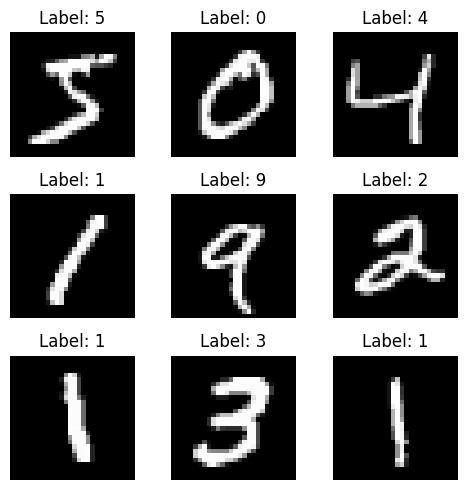

In [6]:
# Looking at the first 9 images in the training set
# This helps to confirm that the data looks correct

plt.figure(figsize=(5,5))  # set the figure size
for i in range(9):
    plt.subplot(3,3,i+1)         # create a 3x3 grid of plots
    plt.imshow(x_train[i], cmap='gray')  # show the image in grayscale
    plt.title(f"Label: {y_train[i]}")    # show the actual number
    plt.axis('off')                      # remove axis lines
plt.tight_layout()
plt.show()


In [7]:
# The pixel values in MNIST images range from 0 to 255.
# Neural networks train better when values are between 0 and 1.
# So divide by 255.0 to normalize the data.

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# CNN models expect input with a "channel" dimension (for grayscale it's 1).
# So expand the shape from (28, 28) to (28, 28, 1).

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("New training shape:", x_train.shape)
print("New testing shape:", x_test.shape)


New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


In [9]:
# Import the layers and model building tools from Keras
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
# Build a simple CNN (Convolutional Neural Network)
# The goal is to learn visual patterns in the digits

model = models.Sequential([
    # First convolutional layer: detects basic patterns (edges, curves)
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),  # reduces image size while keeping key info
    
    # Second convolutional layer: detects more complex shapes
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Flatten the 2D data to feed into a dense (fully connected) layer
    layers.Flatten(),
    
    # Dense layer: learns combinations of features
    layers.Dense(128, activation='relu'),
    
    # Dropout helps reduce overfitting (randomly turns off 30% of neurons)
    layers.Dropout(0.3),
    
    # Output layer: 10 neurons (one for each digit 0–9)
    layers.Dense(10, activation='softmax')
])

# Show the model structure
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile tells the model how to learn:
# - 'adam' is a smart optimizer that adjusts learning rate automatically
# - 'sparse_categorical_crossentropy' works when labels are integers
# - 'accuracy' tracks performance

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train (fit) the model on training data
# Also set aside 10% for validation to monitor progress
history = model.fit(
    x_train, y_train,
    epochs=5,           # run through the dataset 5 times (increase to 7–8 if needed)
    batch_size=128,     # number of images per training step
    validation_split=0.1,
    verbose=2           # shows progress per epoch
)


Epoch 1/5
422/422 - 17s - 40ms/step - accuracy: 0.9190 - loss: 0.2635 - val_accuracy: 0.9838 - val_loss: 0.0611
Epoch 2/5
422/422 - 13s - 30ms/step - accuracy: 0.9767 - loss: 0.0758 - val_accuracy: 0.9858 - val_loss: 0.0454
Epoch 3/5
422/422 - 12s - 29ms/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9868 - val_loss: 0.0434
Epoch 4/5
422/422 - 12s - 29ms/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.9890 - val_loss: 0.0367
Epoch 5/5
422/422 - 12s - 29ms/step - accuracy: 0.9889 - loss: 0.0355 - val_accuracy: 0.9905 - val_loss: 0.0335


In [11]:
# Test the trained model on new (unseen) data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.99


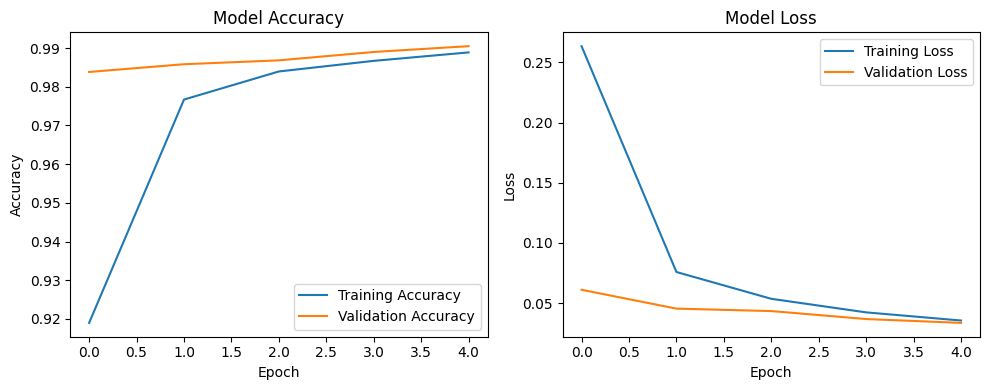

In [12]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(10,4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


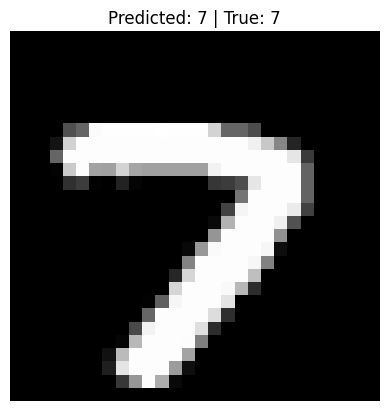

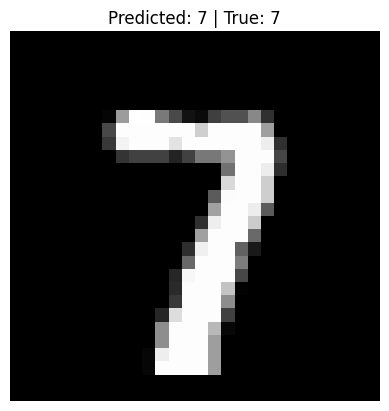

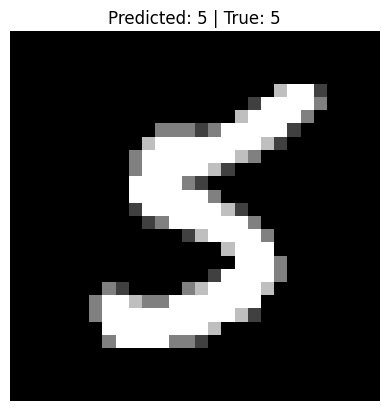

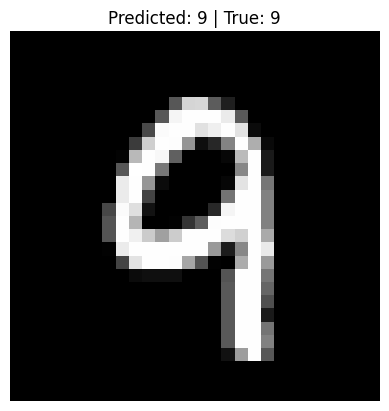

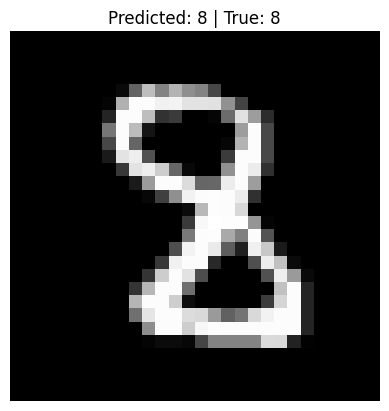

In [13]:
# Pick 5 random images from the test set
idx = np.random.choice(len(x_test), size=5, replace=False)
samples = x_test[idx]
labels = y_test[idx]

# Make predictions
predictions = model.predict(samples)

# Display each image with its predicted and actual label
for i in range(5):
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {labels[i]}")
    plt.axis('off')
    plt.show()
